# Preparação

In [1]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
#import re
#import unidecode
import requests as req
from IPython.display import clear_output
#from unidecode import unidecode
import os

# Download dos dados da Receita Federal

In [2]:
#Função de download
def baixar(url, local):
    resposta = req.get(url, stream = True)
    
    if resposta.status_code == req.codes.OK:
        with open(local, 'wb') as novo_arquivo:
                for chunk in resposta.iter_content(chunk_size=1024):
                    if chunk:
                        novo_arquivo.write(chunk)
                    else:
                        novo_arquivo.write(resposta.content) 
                        
        print('Download concluído. Arquivo salvo em {}'.format(local))
    else:
        resposta.raise_for_status()

In [ ]:
# download propriamente dito
try:
    for i in range(0,10):
        clear_output(wait=True)
        caminho = f'http://200.152.38.155/CNPJ/Estabelecimentos{i}.zip'
        print(f'Fazendo download do arquivo {caminho} ...')
        destino = f'H:/OneDrive - Instituto Presbiteriano Mackenzie/02_PA/Estabelecimentos{i}.zip'        
        
        existencia = os.path.exists(destino)        
        
        if existencia == False:
            clear_output(wait=True)
            print(f'Fazendo Download do arquivo Estabelecimentos{i}!')
            baixar(caminho, destino)
        else:
            clear_output(wait=True)
            print(f'Arquivo Estabelecimentos{i} já baixado!')

        tamanho = os.path.getsize(destino)/1024/1024
        while tamanho < 320: #Verificação do tamanho do arquivo
            clear_output(wait=True)
            baixar(caminho, destino)            
            tamanho = os.path.getsize(destino)/1024/1024
            print(f'Verificando tamanho do arquivo...')

        clear_output(wait=True)     
        print(f'Download do arquivo Estabelecimentos{i} concluído!')
        
    clear_output(wait=True)           
    print('Todos os downloads de Estabelecimentos foram finalizados!')
    
except Exception as error:
    clear_output(wait=True)
    print(f'Erro ao baixar o arquivo do endereço {caminho}')

# Descompactação

In [3]:
#Função de descompactação
def descompact(origem, destinacao):
   with ZipFile(origem, 'r') as zipObj:
      # Extract all the contents of zip file in different directory
      zipObj.extractall(destinacao)
      print('Arquivo {} descompactado!'.format(origem))

In [ ]:
# descompactação propriamente dita

for i in range(0,10):
      
    de = f'H:/OneDrive - Instituto Presbiteriano Mackenzie/02_PA/Estabelecimentos{i}.zip'
    para = f'H:/OneDrive - Instituto Presbiteriano Mackenzie/02_PA/Estabelecimentos{i}'

    descompact(de, para)
    
    arquivoVelhoNome = os.listdir(para)
    os.rename(f'{para}/{arquivoVelhoNome[0]}', f'{para}/{arquivoVelhoNome[0]}.csv') #renomeando o arquivo descompactado
    clear_output(wait=True)

print('Trabalho Concluído!')

# Tratamento dos dados da Receita Federal

In [10]:
# Seleção dos estabelecimentos de Fortaleza/CE nos diversos arquivos

uniao_estabelecimentos = []

for i in range(0,10):
    
    file_path = f'H:/OneDrive - Instituto Presbiteriano Mackenzie/02_PA/Estabelecimentos{i}'
    
    file_csv = os.listdir(file_path)[0] 
    
    arquivo = pd.read_csv(f'file_path/{file_csv}',  sep=';', header=None, encoding = 'Latin-1', dtype='unicode', low_memory=False)

    clear_output(wait=True)

    arquivo = arquivo.drop([0,1,2,3,6,7,8,9,28,29], axis=1)    #Descartando atributos desnecessários, inclusive CNPJ
    arquivo = arquivo[(arquivo[19] == 'CE') & (arquivo[5] == "02") & (arquivo[20] == "2304400")]#2304400 é código IBGE de Fortaleza obtido do site do IBGE* #*https://www.ibge.gov.br/cidades-e-estados/ce/fortaleza.html
    uniao_estabelecimentos.append(arquivo)

uniao_estabelecimentos = pd.concat(uniao_estabelecimentos)

#Renomeando as colunas
uniao_estabelecimentos = uniao_estabelecimentos.rename(columns={13:'TIPO.LOGRADOURO', 14:'LOGRADOURO', 15:'NÚMERO', 16:'COMPLEMENTO', 17:'BAIRRO', 18:'CEP', 19:'UF', 20:'MUNICÍPIO'})

#Novo atributo
uniao_estabelecimentos['NOME.MUNICIPIO'] = 'FORTALEZA'

uniao_estabelecimentos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292776 entries, 2 to 719308
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   TIPO.LOGRADOURO  292776 non-null  object
 1   LOGRADOURO       292776 non-null  object
 2   NÚMERO           292776 non-null  object
 3   COMPLEMENTO      292776 non-null  object
 4   BAIRRO           292776 non-null  object
 5   CEP              292776 non-null  object
 6   UF               292776 non-null  object
 7   MUNICÍPIO        292776 non-null  int64 
 8   NOME.MUNICIPIO   292776 non-null  object
dtypes: int64(1), object(8)
memory usage: 22.3+ MB


In [9]:
uniao_estabelecimentos.head(3)

h:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


TIPO.LOGRADOURO               LOGRADOURO NÚMERO        COMPLEMENTO  \
2         AVENIDA  GENERAL OSORIO DE PAIVA    973           SALA  08   
3             RUA          GUILHERME ROCHA    218  SALA  1104 E 1105   
5             RUA         CONEGO DE CASTRO   5984                 ND   

              BAIRRO       CEP  UF  MUNICÍPIO NOME.MUNICIPIO  
2          PARANGABA  60720015  CE       1389      FORTALEZA  
3             CENTRO  60030140  CE       1389      FORTALEZA  
5  PARQUE SANTA ROSA  60763003  CE       1389      FORTALEZA

In [7]:
uniao_estabelecimentos.head(3)

TIPO.LOGRADOURO               LOGRADOURO NÚMERO        COMPLEMENTO  \
2         AVENIDA  GENERAL OSORIO DE PAIVA    973           SALA  08   
3             RUA          GUILHERME ROCHA    218  SALA  1104 E 1105   
5             RUA         CONEGO DE CASTRO   5984                 ND   

              BAIRRO       CEP  UF  MUNICÍPIO  
2          PARANGABA  60720015  CE       1389  
3             CENTRO  60030140  CE       1389  
5  PARQUE SANTA ROSA  60763003  CE       1389

# Geocodificação

In [19]:
chave = 'xxxxx' # para uso na API

In [143]:
# Função de busca de coordenadas na API
def enderecoApi(tp_logra, logra, num_logra, bairro_logra, munic_logra, cep_logra, uf_logra):
    enderecamento = ''
    if (num_logra != 0 and num_logra != 'SN') and munic_logra != 'ND':
        enderecamento = f'{num_logra} {tp_logra} {logra} {bairro_logra} {munic_logra} {cep_logra} {uf_logra}'
    elif (num_logra == 0 or num_logra == 'SN') and munic_logra != 'ND':
        enderecamento = f'{tp_logra} {logra} {bairro_logra}, {munic_logra} {cep_logra} {uf_logra}'
    elif munic_logra == 'ND':
        enderecamento = f'{tp_logra} {logra} {bairro_logra} {cep_logra} {uf_logra}'
        
    return enderecamento

In [17]:
#Busca das coordenadas

for i in uniao_estabelecimentos.index:  
            
    endereco_busca = enderecoApi(uniao_estabelecimentos["TIPO.LOGRADOURO"][i], uniao_estabelecimentos["LOGRADOURO"][i], uniao_estabelecimentos["NÚMERO"][i], uniao_estabelecimentos["BAIRRO"][i], uniao_estabelecimentos["NOME.MUNICIPIO"][i], uniao_estabelecimentos["CEP"][i], uniao_estabelecimentos["UF"][i])
    
    res = req.get(f'https://geocode.search.hereapi.com/v1/geocode?q={endereco_busca}&lang=pt-BR&apiKey={chave}')
    
    cidade = 'ND'
    lat = None
    lon = None
    precisao_uf = 0
    precisao_cidade = 0
    precisao_cep = 0
    
    if len(res.json()['items']) > 0:
        if len(res.json()['items'][0]) > 0:
            precisao_uf = res.json()['items'][0]['scoring']['fieldScore'].get('state', 0)
            precisao_cidade = res.json()['items'][0]['scoring']['fieldScore'].get('city', 0)
            precisao_cep = res.json()['items'][0]['scoring']['fieldScore'].get('postalCode', 0)
            cidade = res.json()['items'][0]['address'].get('city', 'ND')
            lat = res.json()['items'][0]['position'].get('lat', False)
            lon = res.json()['items'][0]['position'].get('lng', False)                       
            
            if uniao_estabelecimentos['NOME.MUNICIPIO'][i] == 'ND' and (precisao_uf > 0.7 and precisao_cidade > 0.7):
                uniao_estabelecimentos['NOME.MUNICIPIO'][i] = cidade.upper()
                uniao_estabelecimentos['Latitude'][i] = lat
                uniao_estabelecimentos['Longitude'][i] = lon

            elif uniao_estabelecimentos['NOME.MUNICIPIO'][i] == 'ND' and (precisao_uf > 0.7 and precisao_cep > 0.7):
                uniao_estabelecimentos['NOME.MUNICIPIO'][i] = cidade.upper()
                uniao_estabelecimentos['Latitude'][i] = lat
                uniao_estabelecimentos['Longitude'][i] = lon
                
            else:
                uniao_estabelecimentos['Latitude'][i] = lat
                uniao_estabelecimentos['Longitude'][i] = lon
                
uniao_estabelecimentos.head(3)

TIPO.LOGRADOURO               LOGRADOURO NÚMERO        COMPLEMENTO  \
0         AVENIDA  GENERAL OSORIO DE PAIVA    973           SALA  08   
1             RUA          GUILHERME ROCHA    218  SALA  1104 E 1105   
2             RUA         CONEGO DE CASTRO   5984                 ND   

              BAIRRO       CEP  UF  COD.IBGE.MUNICIPIO NOME.MUNICIPIO  \
0          PARANGABA  60720015  CE           2304400.0      FORTALEZA   
1             CENTRO  60030140  CE           2304400.0      FORTALEZA   
2  PARQUE SANTA ROSA  60763003  CE           2304400.0      FORTALEZA   

   Longitude  Latitude    DIS.KM    AGENCIA_PROX  
0  -38.57057  -3.77825  0.632236  AGF JOAO XXIII  
1  -38.52822  -3.72687  0.217005       AGF PAJEU  
2  -38.59908  -3.81483  4.456921   AGF MARAPONGA

In [18]:
uniao_estabelecimentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292776 entries, 0 to 292775
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNPJ                292776 non-null  int64  
 1   TIPO.LOGRADOURO     292776 non-null  object 
 2   LOGRADOURO          292776 non-null  object 
 3   NÚMERO              292776 non-null  object 
 4   COMPLEMENTO         292776 non-null  object 
 5   BAIRRO              292776 non-null  object 
 6   CEP                 292776 non-null  int64  
 7   UF                  292776 non-null  object 
 8   COD.IBGE.MUNICIPIO  292776 non-null  float64
 9   NOME.MUNICIPIO      292776 non-null  object 
 10  Longitude           292776 non-null  float64
 11  Latitude            292776 non-null  float64
 12  DIS.KM              292776 non-null  float64
 13  AGENCIA_PROX        292776 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 31.3+ MB


# Geocodificação da coordenadas das Agências dos Correios

In [ ]:
# Uso da planilha criada pelo Grupo com os endereço das agências dos Correios em Fortaleza/CE
agencias = pd.read_excel(r'H:\OneDrive - Instituto Presbiteriano Mackenzie\02_PA\Agencias_Correios_Fortaleza.xlsx')
agencias.head(3)

Agência                  Endereço Complemento Número   BAIRRO  \
0           AC ALDEOTA         RUA MARIA TOMASIA         NaN    683  ALDEOTA   
1        AC ALENCARINA    AVENIDA OLIVEIRA PAIVA         NaN   2800  CAMBEBA   
2  AC BARAO DE STUDART  AVENIDA BARAO DE STUDART     LOJA AB   1864  ALDEOTA   

   Município  UF       CEP  
0  FORTALEZA  CE  60150970  
1  FORTALEZA  CE  60822970  
2  FORTALEZA  CE  60120970

In [19]:
#Busca das coordenadas das agências

for i in agencias.index:  
            
    endereco_busca = enderecoApi(agencias["Endereço"][i], agencias["Número"][i], agencias["BAIRRO"][i], agencias["Município"][i], agencias["CEP"][i], agencias["UF"][i])
    
    res = req.get(f'https://geocode.search.hereapi.com/v1/geocode?q={endereco_busca}&lang=pt-BR&apiKey={chave}')
    
    cidade = 'ND'
    lat = None
    lon = None
    precisao_uf = 0
    precisao_cidade = 0
    precisao_cep = 0
    
    if len(res.json()['items']) > 0:
        if len(res.json()['items'][0]) > 0:
            precisao_uf = res.json()['items'][0]['scoring']['fieldScore'].get('state', 0)
            precisao_cidade = res.json()['items'][0]['scoring']['fieldScore'].get('city', 0)
            precisao_cep = res.json()['items'][0]['scoring']['fieldScore'].get('postalCode', 0)
            cidade = res.json()['items'][0]['address'].get('city', 'ND')
            lat = res.json()['items'][0]['position'].get('lat', False)
            lon = res.json()['items'][0]['position'].get('lng', False)                       
            
            if agencias['Município'][i] == 'ND' and (precisao_uf > 0.7 and precisao_cidade > 0.7):
                agencias['Município'][i] = cidade.upper()
                agencias['LAT'][i] = lat
                agencias['LON'][i] = lon

            elif agencias['Município'][i] == 'ND' and (precisao_uf > 0.7 and precisao_cep > 0.7):
                agencias['Município'][i] = cidade.upper()
                agencias['LAT'][i] = lat
                agencias['LON'][i] = lon
                
            else:
                agencias['LAT'][i] = lat
                agencias['LON'][i] = lon
                
agencias.head(3)

Agência                  Endereço Complemento Número   BAIRRO  \
0           AC ALDEOTA         RUA MARIA TOMASIA         NaN    683  ALDEOTA   
1        AC ALENCARINA    AVENIDA OLIVEIRA PAIVA         NaN   2800  CAMBEBA   
2  AC BARAO DE STUDART  AVENIDA BARAO DE STUDART     LOJA AB   1864  ALDEOTA   

   Município  UF       CEP       LAT        LON  
0  FORTALEZA  CE  60150970  -3.73587  -38.49592  
1  FORTALEZA  CE  60822970  -3.79615  -38.48303  
2  FORTALEZA  CE  60120970  -3.73975  -38.50838

# Calculando as Distâncias em km

In [2]:
from haversine import haversine
import re

In [21]:
agencias_sel = [] #lista de agências selecionada respectivamente para cada instituição
dist = [] #lista das distâncias mínimas selecionadas respectivamente para cada instituição

for j in uniao_estabelecimentos['CNPJ'].index:    
    
    if uniao_estabelecimentos['DIS.KM'][j] > 8: # retirar condição

        inst_coords = (float(uniao_estabelecimentos['Latitude'][j]), float(uniao_estabelecimentos['Longitude'][j]))

        distancia = 10**100

        agencia = None

        for i in agencias.index:

            agencia_coords = (float(agencias['LAT'][i]), float(agencias['LON'][i]))
            calculo = haversine(agencia_coords, inst_coords)  # distância haversine em km
            
            if   distancia >  calculo:
                distancia = calculo
                agencia = agencias['Agência'][i]
                
        uniao_estabelecimentos['DIS.KM'][j], uniao_estabelecimentos['AGENCIA_PROX'][j] = distancia, agencia

uniao_estabelecimentos.head(3)

h:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


TIPO.LOGRADOURO               LOGRADOURO NÚMERO        COMPLEMENTO  \
2         AVENIDA  GENERAL OSORIO DE PAIVA    973           SALA  08   
3             RUA          GUILHERME ROCHA    218  SALA  1104 E 1105   
5             RUA         CONEGO DE CASTRO   5984                 ND   

              BAIRRO       CEP  UF  MUNICÍPIO NOME.MUNICIPIO  Longitude  \
2          PARANGABA  60720015  CE       1389      FORTALEZA  -38.57057   
3             CENTRO  60030140  CE       1389      FORTALEZA  -38.52822   
5  PARQUE SANTA ROSA  60763003  CE       1389      FORTALEZA  -38.59908   

   Latitude              DIS.KM    AGENCIA_PROX  
2  -3.77825  0.6322358667606414  AGF JOAO XXIII  
3  -3.72687  0.2170052672702245       AGF PAJEU  
5  -3.81483  3.5351648054116995       AC CAXIAS

In [ ]:
uniao_estabelecimentos = pd.read_csv(r'F:\correios\OneDrive - Correios.com.br\GEDEM\09_Power_BI\base_pbi.csv', sep=';')
uniao_estabelecimentos = uniao_estabelecimentos[uniao_estabelecimentos['NOME.MUNICIPIO'] == 'FORTALEZA']
uniao_estabelecimentos = uniao_estabelecimentos[['TIPO.LOGRADOURO', 'LOGRADOURO', 'NÚMERO', 'COMPLEMENTO','BAIRRO', 'CEP', 'UF', 'MUNICÍPIO', 'NOME.MUNICIPIO', 'Longitude', 'Latitude', 'DIS.KM', 'AGENCIA.PRONEG']]
uniao_estabelecimentos['DIS.KM'] = uniao_estabelecimentos['DIS.KM'].astype('float')
uniao_estabelecimentos.rename({'AGENCIA.PRONEG':'AGENCIA_PROX'}, axis=1, inplace=True)
uniao_estabelecimentos.head(3)

In [22]:
uniao_estabelecimentos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292776 entries, 2 to 719308
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TIPO.LOGRADOURO  292776 non-null  object 
 1   LOGRADOURO       292776 non-null  object 
 2   NÚMERO           292776 non-null  object 
 3   COMPLEMENTO      292776 non-null  object 
 4   BAIRRO           292776 non-null  object 
 5   CEP              292776 non-null  object 
 6   UF               292776 non-null  object 
 7   MUNICÍPIO        292776 non-null  int64  
 8   NOME.MUNICIPIO   292776 non-null  object 
 9   Longitude        292776 non-null  float64
 10  Latitude         292776 non-null  float64
 11  DIS.KM           292776 non-null  object 
 12  AGENCIA_PROX     292776 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 31.3+ MB


In [24]:
#Conferindo Quantoidade de Agências
lista_agencias = sorted(pd.unique(agencias['Agência']))
len(lista_agencias)

30

# Métricas Estatísticas

In [3]:
from scipy.stats import kurtosis
from scipy.stats import skew

In [51]:
uniao_estabelecimentos[['AGENCIA_PROX', 'DIS.KM']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292776 entries, 2 to 719308
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AGENCIA_PROX  292776 non-null  object 
 1   DIS.KM        292776 non-null  float64
dtypes: float64(1), object(1)
memory usage: 14.8+ MB


In [65]:
uniao_estabelecimentos['DIS.KM'] = uniao_estabelecimentos['DIS.KM'].astype('float')

df_metricas = uniao_estabelecimentos[['AGENCIA_PROX', 'DIS.KM']].groupby('AGENCIA_PROX').agg(['mean','median', 'std','var', 'count', 'min', 'max']).values
df_metricas = pd.DataFrame(df_metricas)
df_metricas['UNIDADE'] = lista_agencias
df_metricas.rename({0:'Média', 1:'Mediana', 2:'Desvio-padrão', 3:'Variância', 4:'QTD INST', 5:'Mínimo', 6:'Máximo'}, axis=1, inplace=True)
df_metricas = df_metricas[['UNIDADE', 'QTD INST','Média', 'Mediana', 'Desvio-padrão', 'Variância', 'Mínimo','Máximo']]
df_metricas['Amplitude'] = df_metricas['Máximo'] - df_metricas['Mínimo']
df_metricas['Coeficiente de Variação'] = round(df_metricas['Desvio-padrão']/df_metricas['Média'], 2)

assimetrias = []
curtoses = []

for i in lista_agencias:
    lista_unidade = uniao_estabelecimentos[uniao_estabelecimentos['AGENCIA_PROX'] == i]['DIS.KM']
    curtose = kurtosis(lista_unidade)
    curtoses.append(curtose)
    assimetria = skew(lista_unidade)
    assimetrias.append(assimetria)
    
df_metricas['Assimetria/Skew'] = assimetrias
df_metricas['Curtose (Fisher)'] = curtoses

df_metricas.sort_values(by='QTD INST', ascending=False, ignore_index=True, inplace=True)

df_metricas = df_metricas.append({'UNIDADE' : 'GERAL' , 'QTD INST' : uniao_estabelecimentos['QTD INST'].sum(), 'Média' : uniao_estabelecimentos['DIS.KM'].mean(), 'Mediana': uniao_estabelecimentos['DIS.KM'].median() , 'Desvio-padrão':uniao_estabelecimentos['DIS.KM'].std(), 'Variância': uniao_estabelecimentos['DIS.KM'].var(), 'Mínimo': uniao_estabelecimentos['DIS.KM'].min(), 'Máximo': uniao_estabelecimentos['DIS.KM'].max(), 'Amplitude': uniao_estabelecimentos['DIS.KM'].max() - uniao_estabelecimentos['DIS.KM'].min(), 'Coeficiente de Variação': round(uniao_estabelecimentos['DIS.KM'].std()/uniao_estabelecimentos['DIS.KM'].mean(), 2), 'Assimetria/Skew': skew(uniao_estabelecimentos['DIS.KM']), 'Curtose (Fisher)':kurtosis(uniao_estabelecimentos['DIS.KM'])} , ignore_index=True)

df_metricas.head()

UNIDADE  QTD INST     Média   Mediana  Desvio-padrão  \
0             AGF MARAPONGA     21875  2.406031  2.319844       1.245963   
1                AC ALDEOTA     20076  0.744884  0.664822       0.437261   
2         AC CONJUNTO CEARA     19882  2.560054  2.397242       1.510532   
3             AC ALENCARINA     17557  1.848398  1.702097       1.095284   
4               AC MONDUBIM     17186  2.205419  2.079479       1.219819   
5         AGF MOZART LUCENA     16459  1.522102  1.499660       0.726520   
6                 AGF DUNAS     14522  1.527144  1.301043       1.015635   
7     AGF SARGENTO HERMINIO     12223  1.398962  1.405948       0.638359   
8            AGF CAJAZEIRAS     11294  2.036032  1.941358       0.982491   
9        AGF HENRIQUE JORGE     10909  1.238113  1.203903       0.571043   
10             AC MESSEJANA     10849  1.784954  1.587505       1.097524   
11  AC CENTRAL DE FORTALEZA     10846  0.247733  0.042335       0.288395   
12      AGF DIONISIO TORRES     10655  1.206725  0.891248       0.848798   
13               AC MONTESE     10043  1.056541  0.864413       0.797475   
14           AGF JOAO XXIII      9511  1.310717  1.231557       0.683158   
15          AC FRANCISCO SA      8110  0.973142  0.924518       0.424632   
16   AGF BEZERRA DE MENEZES      7632  0.997806  0.837021       0.581892   
17              AC IGUATEMI      7149  1.251005  1.248223       0.802581   
18             AC PARANGABA      6913  1.116165  1.088643       0.497626   
19                AGF PAJEU      6778  0.461801  0.399723       0.302945   
20         AGF MISSIONARIAS      5902  0.441144  0.395387       0.273065   
21       AC RODOLFO TEOFILO      5362  0.906949  0.883273       0.431193   
22      AC BARAO DE STUDART      5335  0.668894  0.632554       0.312411   
23     AGF CLOVIS BEVILAQUA      5137  2.326013  2.435799       1.329636   
24         AC DRAGAO DO MAR      4097  0.457301  0.459416       0.192464   
25       AGF JOSE BONIFACIO      3863  0.651812  0.625543       0.344016   
26             AGF MEIRELES      3813  0.404918  0.428409       0.195124   
27        AGF TREZE DE MAIO      3251  0.600070  0.605502       0.276264   
28       AGF JOAQUIM TAVORA      3012  0.434076  0.446917       0.180997   
29             AGF PAMPLONA      2458  0.436545  0.421185       0.212750   
30                    GERAL    292699  1.421955  1.121116       1.114831   

    Variância  Mínimo    Máximo  Amplitude  Coeficiente de Variação  \
0    1.552425       0  6.256113   6.256113                     0.52   
1    0.191197       0  2.425828   2.425828                     0.59   
2    2.281706       0  7.886201   7.886201                     0.59   
3    1.199646       0  7.990248   7.990248                     0.59   
4    1.487957       0  7.989717   7.989717                     0.55   
5    0.527831       0  7.901592   7.901592                     0.48   
6    1.031514       0  5.975812   5.975812                     0.67   
7    0.407503       0  2.993612   2.993612                     0.46   
8    0.965288       0  4.019909   4.019909                     0.48   
9    0.326090       0  2.700640   2.700640                     0.46   
10   1.204560       0  5.490461   5.490461                     0.61   
11   0.083171       0  1.638096   1.638096                     1.16   
12   0.720458       0  4.144991   4.144991                     0.70   
13   0.635967       0  4.106255   4.106255                     0.75   
14   0.466705       0  3.401795   3.401795                     0.52   
15   0.180312       0  2.099656   2.099656                     0.44   
16   0.338598       0  2.577108   2.577108                     0.58   
17   0.644137       0  3.607136   3.607136                     0.64   
18   0.247631       0  2.649499   2.649499                     0.45   
19   0.091776       0  1.182350   1.182350                     0.66   
20   0.074564       0  1.302282   1.302282                     0.62   
21   0.185927       0  1.

In [66]:
df_metricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNIDADE                  31 non-null     object 
 1   QTD INST                 31 non-null     int64  
 2   Média                    31 non-null     float64
 3   Mediana                  31 non-null     float64
 4   Desvio-padrão            31 non-null     float64
 5   Variância                31 non-null     float64
 6   Mínimo                   31 non-null     int64  
 7   Máximo                   31 non-null     float64
 8   Amplitude                31 non-null     float64
 9   Coeficiente de Variação  31 non-null     float64
 10  Assimetria/Skew          31 non-null     float64
 11  Curtose (Fisher)         31 non-null     float64
dtypes: float64(9), int64(2), object(1)
memory usage: 3.0+ KB


In [68]:
df_metricas = pd.read_excel(r'H:\OneDrive - Instituto Presbiteriano Mackenzie\02_PA\Estatisticas_AC.xlsx')
df_metricas.head(3)

UNIDADE  QTD INST     Média   Mediana  Desvio-padrão  Variância  \
0      AGF MARAPONGA     21875  2.406031  2.319844       1.245963   1.552425   
1         AC ALDEOTA     20076  0.744884  0.664822       0.437261   0.191197   
2  AC CONJUNTO CEARA     19882  2.560054  2.397242       1.510532   2.281706   

   Mínimo    Máximo  Amplitude  Coeficiente de Variação  Assimetria/Skew  \
0       0  6.256113   6.256113                     0.52         0.314446   
1       0  2.425828   2.425828                     0.59         0.908659   
2       0  7.886201   7.886201                     0.59         0.562143   

   Curtose (Fisher)  
0         -0.423119  
1          0.766125  
2         -0.527760

# Gráficos com *Seaborn*

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
%matplotlib inline

<Figure size 1440x864 with 0 Axes>

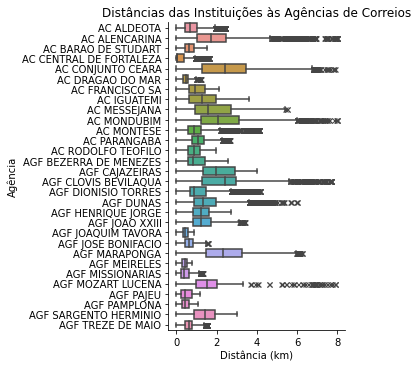

In [213]:
#Boxplot Horizontal
plt.figure(figsize =(20, 12))
sns.catplot(y = 'AGENCIA_PROX', x = 'DIS.KM', data = uniao_estabelecimentos, orient='h', kind="box", margin_titles=True, flierprops={"marker": "x"})
plt.title("Distâncias das Instituições às Agências de Correios", loc="center", fontsize=12)
plt.xlabel("Distância (km)")
plt.ylabel("Agência")
plt.show()

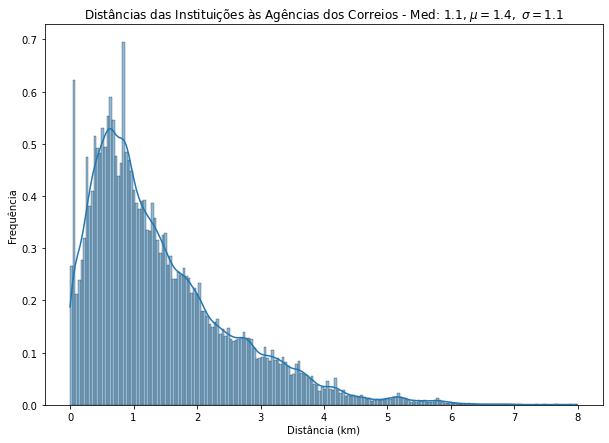

In [214]:
#Histograma com densidade
plt.figure(figsize =(10,7))
n_vetor = uniao_estabelecimentos['DIS.KM']
sns.histplot(data=uniao_estabelecimentos, x="DIS.KM", kde=True,stat="density")
#plt.title("Distâncias das Instituições às Agências de Correios", loc="center", fontsize=12)
plt.title(f"Distâncias das Instituições às Agências dos Correios - Med: {round(statistics.median(n_vetor), 1)}, " + fr'$\mu={round(statistics.mean(n_vetor),1)},\ \sigma={round(statistics.stdev(n_vetor),1)}$', loc="center", fontsize=12)
plt.xlabel("Distância (km)")
plt.ylabel("Frequência")
plt.show()

<Figure size 720x432 with 0 Axes>

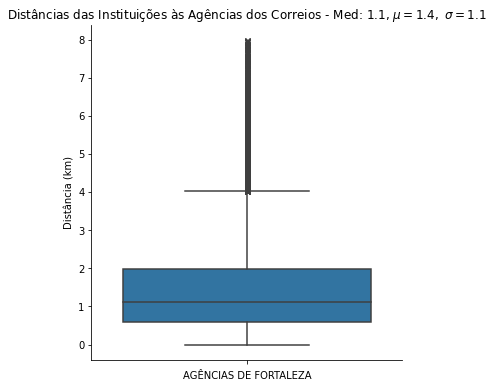

In [215]:
#Boxplot com os dados gerais
plt.figure(figsize =(10,6))
n_vetor = uniao_estabelecimentos['DIS.KM']
sns.catplot(y= 'DIS.KM', data = uniao_estabelecimentos, kind="box", margin_titles=True, flierprops={"marker": "x"})
plt.title(f"Distâncias das Instituições às Agências dos Correios - Med: {round(statistics.median(n_vetor), 1)}, " + fr'$\mu={round(statistics.mean(n_vetor),1)},\ \sigma={round(statistics.stdev(n_vetor),1)}$', loc="center", fontsize=12)
#axis[x, y].set_title(f"{i} - Med: {round(statistics.median(n_vetor), 1)}, " + fr'$\mu={round(statistics.mean(n_vetor),1)},\ \sigma={round(statistics.stdev(n_vetor),1)}$') 
plt.xlabel("AGÊNCIAS DE FORTALEZA")
plt.ylabel("Distância (km)")
plt.show()

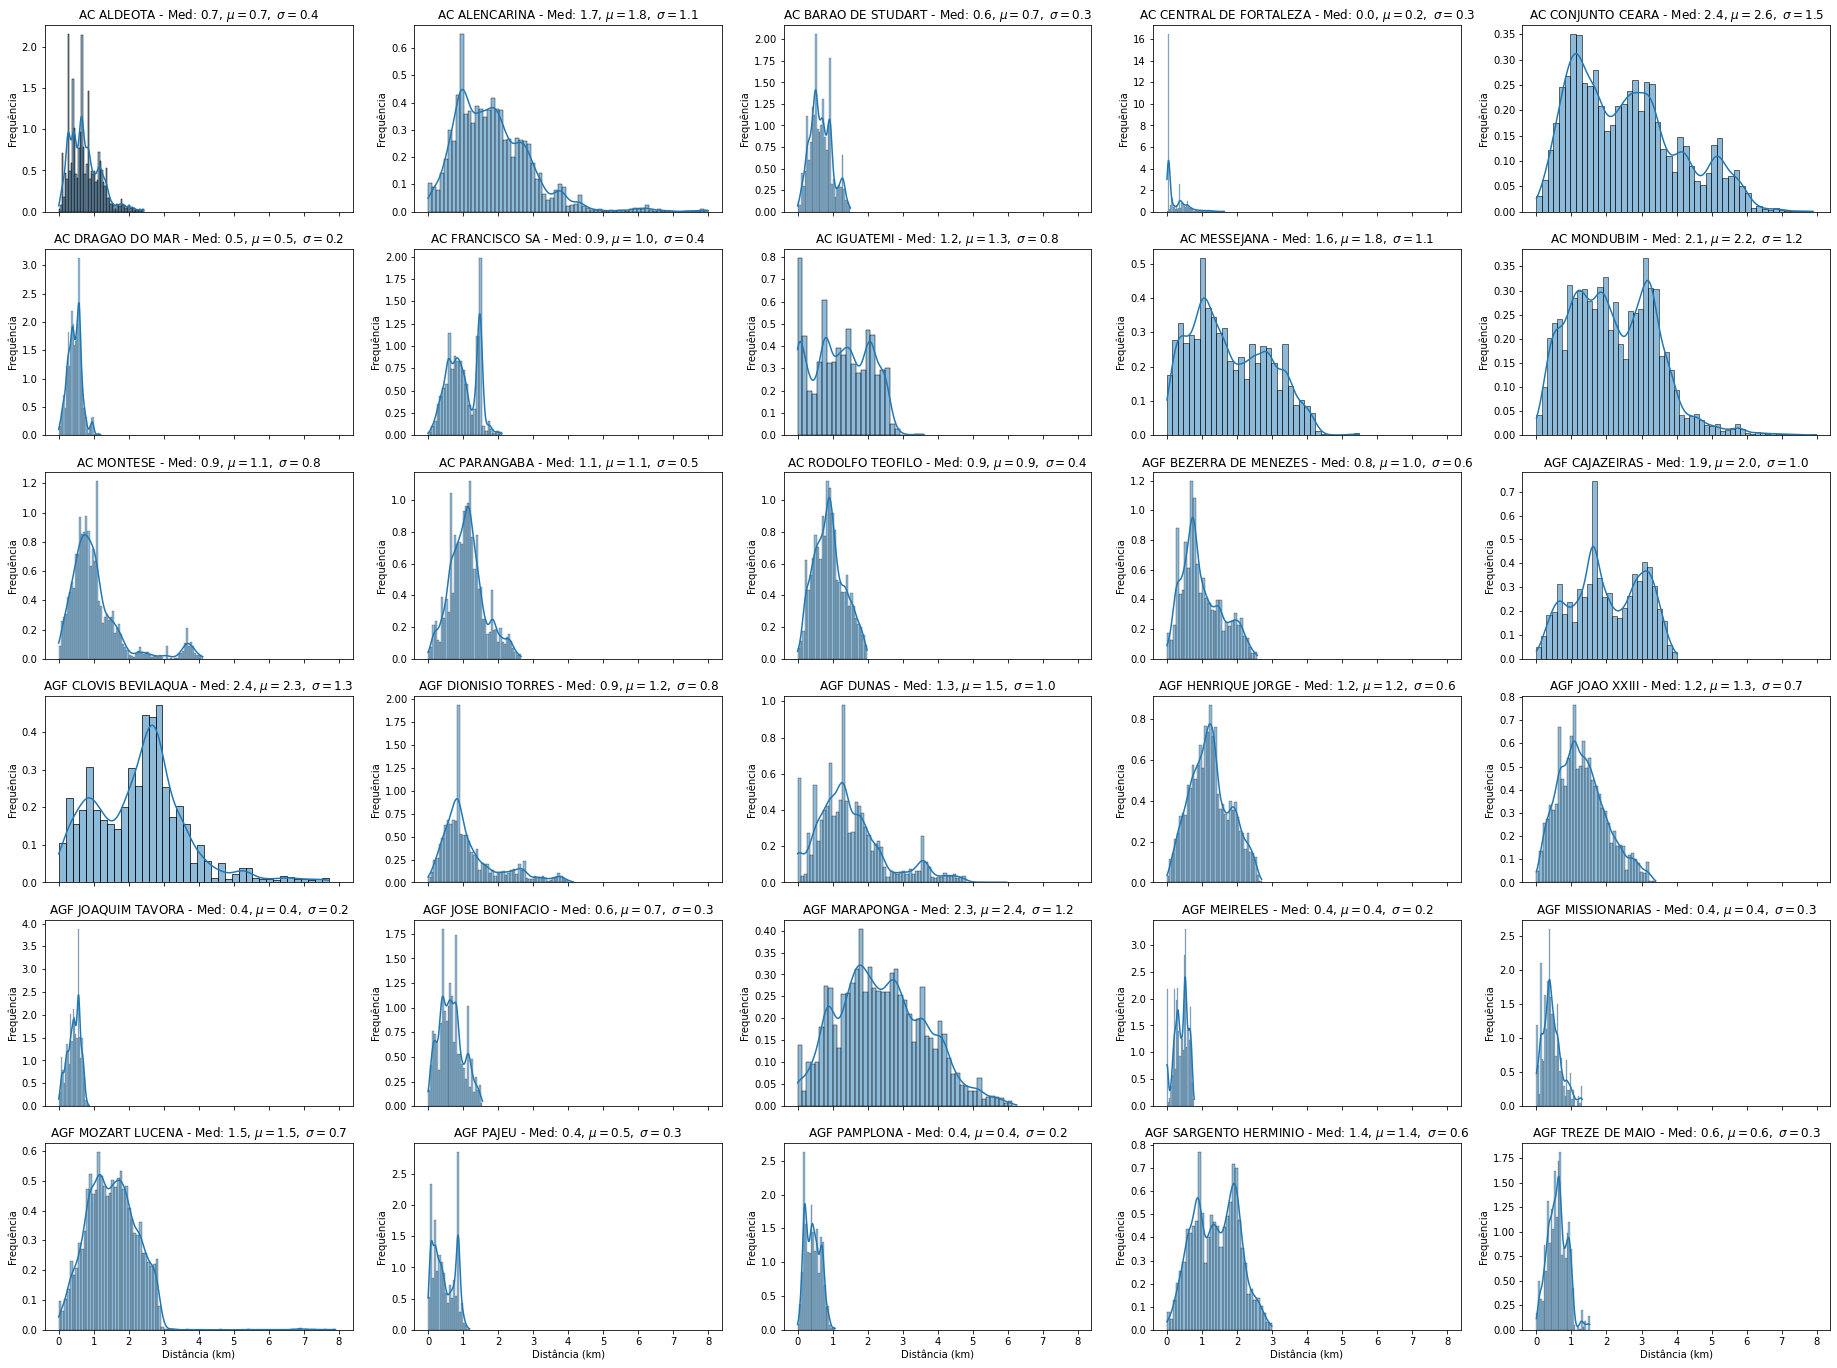

In [216]:
#Histograma e gráfico de densidade considerando a distribuição das instituições por cada agência dos Correios de Fortaleza
figure, axis = plt.subplots(6,5, figsize=(32,24), sharex=True ) # sharey=True, figsize=(20,8)

x = 0
y = 0

for i in lista_agencias:
    
    df_ag = uniao_estabelecimentos[uniao_estabelecimentos['AGENCIA_PROX'] == i]#['DIS.KM']
    vetor = df_ag['DIS.KM']
    sns.histplot(data=df_ag, x="DIS.KM", kde=True,stat="density", ax=axis[x][y])    
    axis[x, y].set_title(f"{i} - Med: {round(statistics.median(vetor), 1)}, " + fr'$\mu={round(statistics.mean(vetor),1)},\ \sigma={round(statistics.stdev(vetor),1)}$') 
    #axis[x, y].set_title(i)
    axis[x, y].set_ylabel('Frequência')
    axis[x, y].set_xlabel('Distância (km)')
    #axis[x, y].xlabel
    
    y += 1
    
    if y > 4:
        y -= 5
        x += 1
        
plt.show()

In [217]:
#Contagem de Instituições por agência
uniao_estabelecimentos['AGENCIA_PROX'].value_counts()

AGF MARAPONGA              21875
AC ALDEOTA                 20076
AC CONJUNTO CEARA          19882
AC ALENCARINA              17557
AC MONDUBIM                17186
AGF MOZART LUCENA          16459
AGF DUNAS                  14522
AGF SARGENTO HERMINIO      12223
AGF CAJAZEIRAS             11294
AGF HENRIQUE JORGE         10909
AC MESSEJANA               10849
AC CENTRAL DE FORTALEZA    10846
AGF DIONISIO TORRES        10655
AC MONTESE                 10043
AGF JOAO XXIII              9511
AC FRANCISCO SA             8110
AGF BEZERRA DE MENEZES      7632
AC IGUATEMI                 7149
AC PARANGABA                6913
AGF PAJEU                   6778
AGF MISSIONARIAS            5902
AC RODOLFO TEOFILO          5362
AC BARAO DE STUDART         5335
AGF CLOVIS BEVILAQUA        5137
AC DRAGAO DO MAR            4097
AGF JOSE BONIFACIO          3863
AGF MEIRELES                3813
AGF TREZE DE MAIO           3251
AGF JOAQUIM TAVORA          3012
AGF PAMPLONA                2458
Name: AGEN

In [218]:
#Geração de arquivo csv
df_metricas.to_csv(r'H:\OneDrive - Instituto Presbiteriano Mackenzie\02_PA\Estatisticas_AC.csv', sep=';', index=False)

In [219]:
#Geração de arquivo excel
df_metricas.to_excel(r'H:\OneDrive - Instituto Presbiteriano Mackenzie\02_PA\Estatisticas_AC.xlsx', index=False)

# Mapas com *Scatterplot*

In [5]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

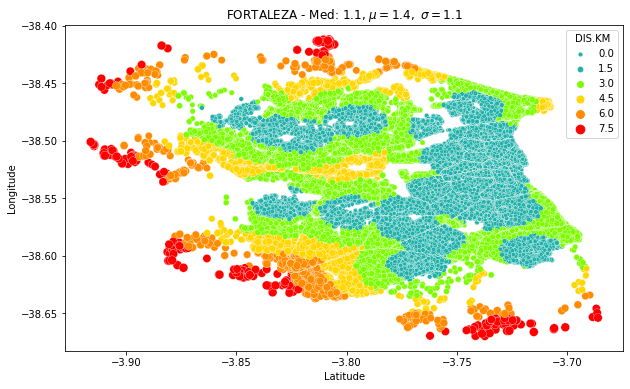

In [224]:
#Visão geral das distâncias em Fortaleza
plt.figure(figsize =(10,6))
n_vetor = uniao_estabelecimentos['DIS.KM']
cmap = ListedColormap(["lightseagreen","lawngreen", "gold","darkorange", "red"])
sns.scatterplot(data=uniao_estabelecimentos, x="Latitude", y="Longitude", hue='DIS.KM',  size='DIS.KM', sizes=(10,80), palette= cmap)
plt.title(f"FORTALEZA - Med: {round(statistics.median(n_vetor), 1)}, " + fr'$\mu={round(statistics.mean(n_vetor),1)},\ \sigma={round(statistics.stdev(n_vetor),1)}$', loc="center", fontsize=12)
#axis[x, y].set_title(f"{i} - Med: {round(statistics.median(n_vetor), 1)}, " + fr'$\mu={round(statistics.mean(n_vetor),1)},\ \sigma={round(statistics.stdev(n_vetor),1)}$') 
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

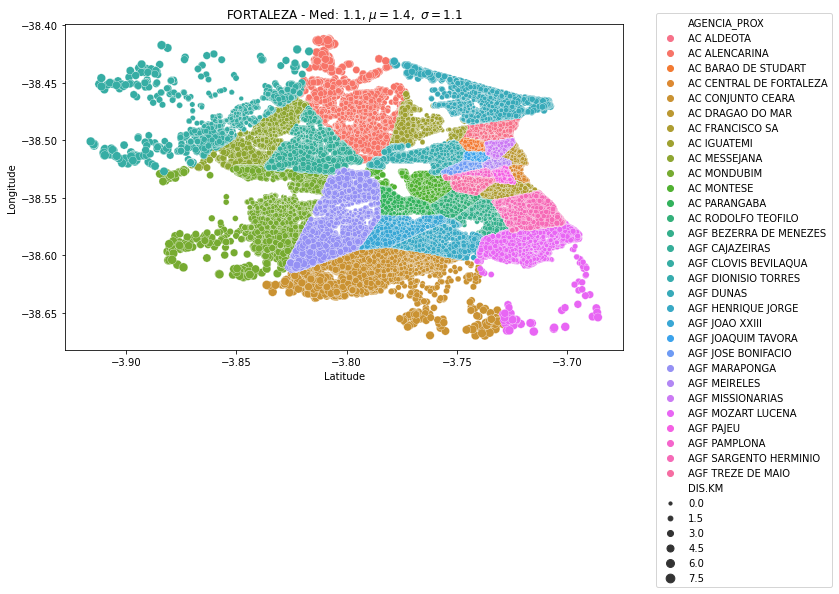

In [225]:
#Visão geral da distribuição de instituições por Agência de Correios Fortaleza
plt.figure(figsize =(10,6))
n_vetor = uniao_estabelecimentos['DIS.KM']
g = sns.scatterplot(data=uniao_estabelecimentos, x="Latitude", y="Longitude", hue='AGENCIA_PROX',  size='DIS.KM', sizes=(10,80))
plt.title(f"FORTALEZA - Med: {round(statistics.median(n_vetor), 1)}, " + fr'$\mu={round(statistics.mean(n_vetor),1)},\ \sigma={round(statistics.stdev(n_vetor),1)}$', loc="center", fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
sns.move_legend(g, "upper left", bbox_to_anchor=(1.05, 1.05))
plt.show()

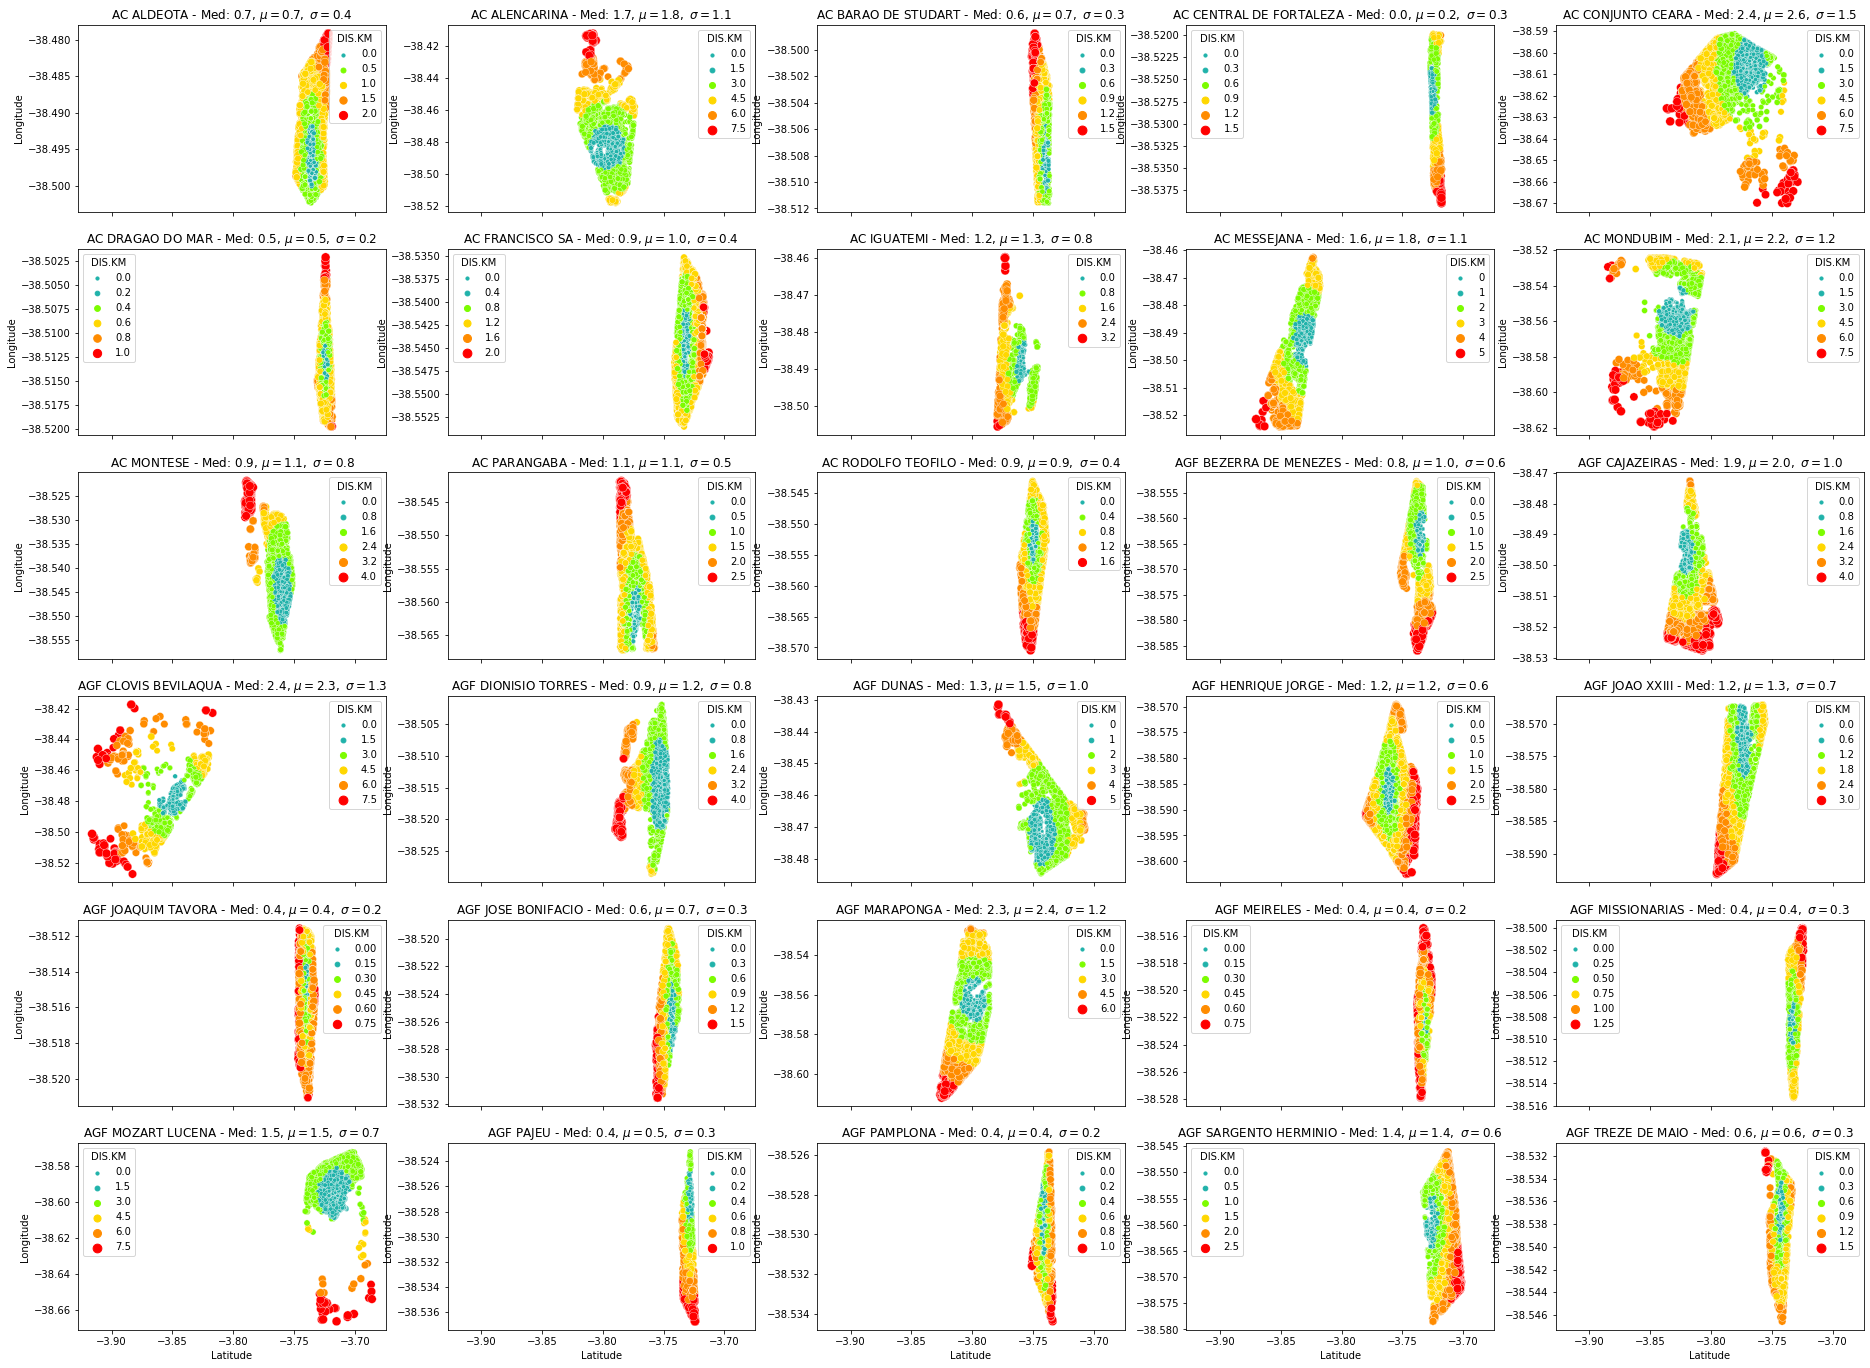

In [226]:
#Visão geral da distribuição de instituições por Cada Agência de Correios Fortaleza
figure, axis = plt.subplots(6,5, figsize=(32,24), sharex=True) # sharey=True, figsize=(20,8)

x = 0
y = 0

for i in lista_agencias:
    
    df_ag = uniao_estabelecimentos[uniao_estabelecimentos['AGENCIA_PROX'] == i]#['DIS.KM']
    vetor = df_ag['DIS.KM']
    sns.scatterplot(data=df_ag, x="Latitude", y="Longitude", hue='DIS.KM',  size='DIS.KM', sizes=(10,80), ax=axis[x][y], palette= cmap)
    axis[x, y].set_title(f"{i} - Med: {round(statistics.median(vetor), 1)}, " + fr'$\mu={round(statistics.mean(vetor),1)},\ \sigma={round(statistics.stdev(vetor),1)}$')     
    axis[x, y].set_ylabel('Longitude')
    axis[x, y].set_xlabel('Latitude')    
    
    y += 1
    
    if y > 4:
        y -= 5
        x += 1
        
plt.show()

# Mapas com *Folium*

In [6]:
import folium
from folium import plugins

In [228]:
agencias.head(2)

Agência                Endereço Complemento Número   BAIRRO  \
0     AC ALDEOTA       RUA MARIA TOMASIA         NaN    683  ALDEOTA   
1  AC ALENCARINA  AVENIDA OLIVEIRA PAIVA         NaN   2800  CAMBEBA   

   Município  UF       CEP       LAT        LON  
0  FORTALEZA  CE  60150970  -3.73587  -38.49592  
1  FORTALEZA  CE  60822970  -3.79615  -38.48303

In [229]:
coord_x = []

#definindo lista de coordenadas das instituições a serem anexadas ao mapa
for lat, lon in zip(uniao_estabelecimentos.Latitude.values, uniao_estabelecimentos.Longitude.values):
    coord_x.append([lat, lon])

#Definição da localização do mapa
mp_x = folium.Map(location=[-3.79615,-38.48303], zoom_start=11)

#anexando coordenadas das agências dos correios ao mapa
for j in agencias.index:    
    agen_selec = agencias['Agência'][j]
    agen_bairro = agencias['BAIRRO'][j]
     # tiles=['Stamen Terrain', 'Stamen Toner']
    folium.Marker([agencias.LAT[j], agencias.LON[j]],
                popup=f'<i>{agen_selec}</i>',
                icon=folium.Icon(color="blue"),
                tooltip = f'Bairro {agen_bairro}'
                ).add_to(mp_x)

#anexando lista de coordenadas das instituições a serem anexadas ao mapa como heatmap
mp_x.add_child(plugins.HeatMap(coord_x))

#mostrando o mapa
mp_x

In [52]:
#salvando o mapa como html
mp_x.save(r'H:\OneDrive - Instituto Presbiteriano Mackenzie\02_PA\index.html')

# K-Médias

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler